# Unsupervised Learning und Anwendungsgebiete

In diesem Notebook werden die in der **Vorlesung 5 Unüberwachtes Lernen** aufgezeigten Algorithmen anhand von einfachen Fallbeispielen implementiert.

Zur kurzen Wiederholung: unüberwachtes Lernen heißt Suchen und Erkennen von Mustern in Daten ohne eine definierte Zielgröße (sogenannte "nicht gelabelte Daten"; das kommt später in Supervised Learning).

Man kann sich das so vorstellen, daß man dem Algorithmus viele Daten wie bspw. Bilder gibt, ohne ihm zu sagen welche Bilder einen Elephant, Tiger oder Mensch darstellt. Der Algorithmus versucht dann Muster zu erkennen- dabei können unbekannte, oft aber auch nicht sinnvolle Zusammenhänge als Ergebnis entstehen.

Das Notebook dient also zur Veranschaulichung und gerne auch zur Übernahme für eigene Projekte wie z.B. der Hausarbeit.

Der Programm-Code basiert auf Beispielen aus der Dokumentation von SciKit-Learn oder Musterbeispielen, die dann aber referenziert werden.

## Einfache Anomaliedetektion

Bei der Anomaliedetektion wollen wir Werte finden, die sich deutlich von der Mehrheit der Daten unterscheiden. Statistisch gesagt suchen wir Werte, die deutlich außerhalb der erwarteten Menge liegen (deshalb wird die Anomaliedetektion oft auch als **Outlier detection** bezeichnet).

Dies kann man am Beispiel der Größe von Menschen veranschaulichen: bei einer Durchschnittsgröße von 1,69 m in China ist Yao Ming mit 2,29 m eine Ausnahme (Quelle Größen: Wikipedia).

Nun sind solche Annahmen nicht immer so leicht zu finden, v.a. in großen Datenmengen. 

Es gibt aber für die Anomaliedetektion verschiedene  Vorgehensweisen, die uns per Libraries zur Verfügung gestellt werden. wir schauen uns hier nur eine an am Beispiel einer Menge von graphischen Punkten. 

Da sich solche Sachen graphisch einfach(er) zeigen lassen, werden wir uns das am Beispiel einer zufällig definierten Punktewolke ansehen.

Dazu definieren wir eine Menge von 500 Punkten mit zufällig verteilten x- und y-Koordinaten.

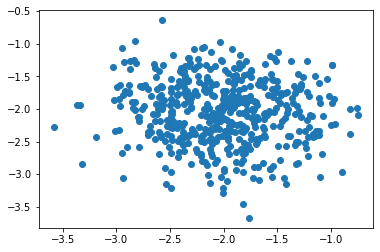

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generieren von zufälligen, normalverteilten Zahlen
x = np.random.normal(loc=-2, scale=.5, size=500)
y = np.random.normal(loc=-2, scale=.5, size=500)

plt.scatter(x,y)
plt.show()

Wenn wir einen zufälligen Punkt aus der obigen Graphik wählen würden, dann würde es sich meistens um einen Punkt aus der Mitte der Graphik handeln, weil hier einfach die meisten Punkte sind. Das heißt, man "erwartet" quasi bei der zufälligen Wahl eines Punktes in den meisten Fällen einen aus der Mitte zu erhalten. 

Eine Anomalie ist dann ein Punkt, der sehr sehr deutlich vom erwarteten Wert abweicht. Somit ist auch klar, daß wir Outlier/ Anomalien eigentlich nur haben können bei einer hohen Streuung der Punkte (dies wird auch **Varianz** genannt).  

Ein Algorithmus für Anomaliedetektion funktioniert also grob gesagt so, daß wir aus der Gesamtmenge aller Punkte, die Punkte haben wollen, die deutlich von der Mehrheit abweichen.

Also Algorithmus für die Entdeckung von Anomalien nehmen wir den Isolation Forest aus der SKLearn-Bibliothek ([Link](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html)).

(450,)
(50,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


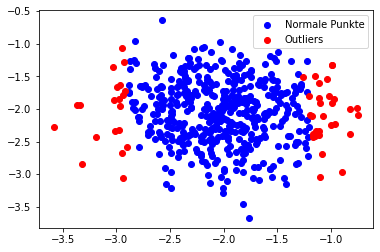

In [2]:
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(n_estimators=100, contamination=0.1)  # Initiieren des Isolation Forest

y_hat = isolation_forest.fit_predict(x.reshape(-1, 1)) # Reshape des Eingangsvektors notwendig, da der Algorithmus eine spezielle Datenstruktur verlangt.

# Aufteilen der Datenmenge in 2 Untermengen mit Outliern und Nicht-outliern, damit man das schöner sehen kann per Graphik
Non_outlier = y_hat != -1  # Herausfiltern aller Outlier. genauer gesagt: Non_outlier enthält alle vorhergesagten Werte die ungleich -1 sind
Outlier = y_hat == -1  #  analog obere Zeile

X_reduced, y_reduced = x[Non_outlier], y[Non_outlier]
X_out, y_out = x[Outlier], y[Outlier]

print(X_reduced.shape) # wie viele X-Punkte bleiben über?
print(X_out.shape) # wie viele X-Punkte wurden herausgefiltert?

ax = plt.gca()
ax.scatter(x=X_reduced, y=y_reduced, c="b", label="Normale Punkte")
ax.scatter(x=X_out,y=y_out, color="r", label="Outliers")
ax.legend()
ax = plt.subplot()

## Clustering

Die Idee von Clustering-Algorithmen ist die Aufteilung einer Datenmenge in verschiedenen Gruppen so daß die Mitglieder einer Gruppe sich untereinander mehr ähneln als Mitgliedern anderer Gruppen. 

Ein Beispiel hierfür ist eine Einteilung einer Schulklasse in verschiedene Untergruppen, bspw. anhand Größe, Geburtsmonat, ...

Wir setzen den aus der Vorlesung vorgestellten KMeans-Algorithmus ein für Clustering der oben definierten zufälligen Werten (aber ohne Filterung Outlier). KMeans teilt eine gegebene Menge in k verschiedene Gruppen ein. Dabei wird für jede der k Gruppen ein Mittelpunkt berechnet, von dem alle Mitglieder den gleichen Abstand haben. Eine genaue Dokumentation von KMeans ist verfügbar unter [Link](https://scikit-learn.org/stable/modules/clustering.html#k-means).

KMeans ist ein schnell einsetzbarer Algorithmus, der aber 2 Nachteile hat:
* er erklärt nicht, wieso er wie geclustert hat.
* Anzahl Cluster muß vornherein mitgegeben werden. Oft kennen wir aber die Struktur der Daten nicht und wissen somit auch nicht, wie viele Cluster wir benötigen. Wir sehen weiter unten eine Methode um grob eine recht gute Anzahl Cluster bestimmen zu können.

Wir werden für das Clustering eine etwas kompliziertere Verteilung uns anschauen. 

Der im weiteren verwendete Code ist entnommen aus [Link](https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html).


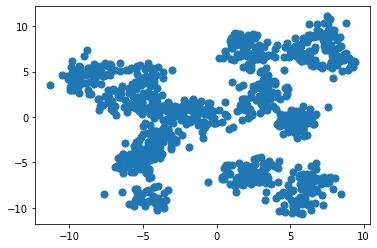

In [4]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=1000, centers=25, cluster_std=0.8, random_state=20)
plt.scatter(X[:, 0], X[:, 1], s=50);

Ziel ist, es alle Punkte dieser Verteilung in trennscharfe Untergruppen einzuteilen. Im realen Leben ist es immer eine Herausforderung, die richtige Anzahl der Untergruppen zu finden: 
* **Zu viele Untergruppen**: Abbildung verschiedener Eigenschaften möglich, aber verhindert eine Generalisierung/ Verallgemeinerung.
* **zu wenige Untergruppen**: erleichtert die Arbeit, die Einteilung wird aber gröber und man macht falsche Einteilungen. Zudem: wenn man möglichstwenig Untergruppen nimmt, dann hätte man sich das Clustering auch sparen können...


Wir veranschaulichen diesen Konflikt durch Anwendung KMeans mit 2, 3 und dann  8 Untergruppen (der Fall k=1 ist ja immer die Ausgangsmenge im oberen Bild).

In [5]:
from sklearn.cluster import KMeans

# Anzahl Cluster
kmeans = KMeans(n_clusters=2)
# Eingabedaten "fitten", d.h. einpassen in 2 Gruppen. Hier geschieht die Arbeit des Algorithmus.
kmeans = kmeans.fit(X)

# Einteilen der Daten in 2 Cluster
groups = kmeans.predict(X)

# Auswerten der Zentrumspunkte je Cluster
centroids = kmeans.cluster_centers_
print(centroids) # From sci-kit learn

[[-4.96951839 -0.14880952]
 [ 4.46103361  0.94883168]]


Was hat das jetzt gebracht? Was soll die Ausgabe mit den 2 Zeilen bringen?

Dazu schauen wir uns das graphisch an:

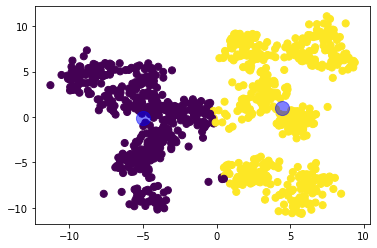

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=groups, s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='blue', s=200, alpha=0.5)

Wir sehen daß die Menge in 2 Klassen eingeteilt worden ist mit den blauen Punkten als Mittelpunkt oder Nabe der jeweiligen Gruppe.

Mit Hilfe der Nabe kann auch veranschaulicht werden, was KMeans iterativ macht. 

* KMeans definiert zufällig eine Anzahl von k Mittelpunkte.
* Wiederhole bis es keine Aktualisierungen mehr gibt:
  * Teile die gesamten Punkte auf in die einzelnen k Gruppen. Dabei kommt ein Punkt in genau die Gruppe, zu deren Mittelpunkt er den geringsten Abstand hat.
  *  Nachdem alle Punkte in eine der k Gruppen eingeteilt wurden, ist der aktuelle Mittelpunkt nicht zwingend mehr der Mittelpunkt der Gruppe. Deshalb wird ein neuer Mittelpunkt je Gruppe berechnet.

Schauen wir uns an, wie das ganze für 3 Gruppen aussieht:

In [8]:
kmeans = KMeans(n_clusters=3)
kmeans = kmeans.fit(X)
groups = kmeans.predict(X)

[[ 4.66618631  4.61571627]
 [ 2.46774099 -7.39351715]
 [-4.93966868  0.67381028]]


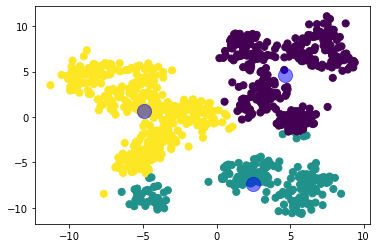

In [9]:
centroids = kmeans.cluster_centers_
print(centroids)
plt.scatter(X[:, 0], X[:, 1], c=groups, s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='blue', s=200, alpha=0.5)

Und jetzt für 8 Gruppen

In [10]:
kmeans = KMeans(n_clusters=8)
kmeans = kmeans.fit(X)
groups = kmeans.predict(X)

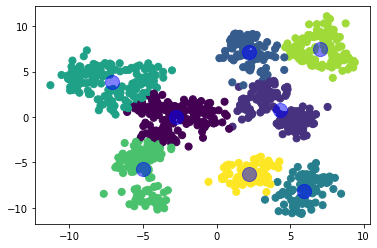

In [12]:
centroids = kmeans.cluster_centers_
#print(centroids)

plt.scatter(X[:, 0], X[:, 1], c=groups, s=50)
plt.scatter(centroids[:, 0], centroids[:, 1], c='blue', s=200, alpha=0.5)

Man sieht deutlich den Unterschied....

Die Frage ist aber, wie viele Gruppen sollte man denn nehmen, um einen möglichst guten Ausgleich zwischen Generalisierung und Individualisierung zu finden?

Hierfür eignet sich die sogenannte **Ellbogen-Methode**.

### Ellbogen-Methode

Die Ellbogen-Methode wird [Robert L. Thorndike](https://en.wikipedia.org/wiki/Robert_L._Thorndike) zugeschrieben, der diese 1953 entwickelte.

Der [Wikipedia-Artikel](https://en.wikipedia.org/wiki/Elbow_method_(clustering)#:~:text=In%20cluster%20analysis%2C%20the%20elbow,number%20of%20clusters%20to%20use.) detailliert die Methode wie folgt:

"Using the "elbow" or "knee of a curve" as a cutoff point is a common heuristic in mathematical optimization to choose a point where diminishing returns are no longer worth the additional cost. In clustering, this means one should choose a number of clusters so that adding another cluster doesn't give much better modeling of the data.

The intuition is that increasing the number of clusters will naturally improve the fit (explain more of the variation), since there are more parameters (more clusters) to use, but that at some point this is over-fitting, and the elbow reflects this. 

The idea is that the first clusters will add much information (explain a lot of variation), since the data actually consist of that many groups (so these clusters are necessary), but once the number of clusters exceeds the actual number of groups in the data, the added information will drop sharply, because it is just subdividing the actual groups. Assuming this happens, there will be a sharp elbow in the graph of explained variation versus clusters: increasing rapidly up to k (under-fitting region), and then increasing slowly after k (over-fitting region)."


Wir verwenden 3 Schritte:
1. KMeans mit einer hohen Anzahl von Clustern trainieren. Dabei für jeden Durchlauf den quadrierten Fehler abspeichern im Array sse. Dieser Fehler ist größer, je weniger Klassen es gibt. Man kann sich das also als Generalisierungsfehler vorstellen. 
2. Plotten der Graphik für die einzelnen Fehler im Array SSE
3. Plot anschauen und den Ellbogen finden. Das ist der Punkt, an dem der Plot schräg abfällt. Im u.a. Fallbeispiel wäre das entweder für 3 oder 4.

Wir nehmen wieder die gleiche Verteilung von vorher


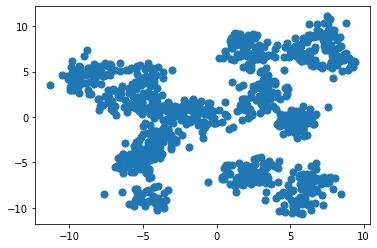

In [13]:
plt.scatter(X[:, 0], X[:, 1], s=50)

In [14]:
# Schritt 1: Trainieren
sse = []
for k in range(1, 11):
  kmeans_loop = KMeans(n_clusters=k)
  kmeans_loop.fit(X)
  sse.append(kmeans_loop.inertia_)

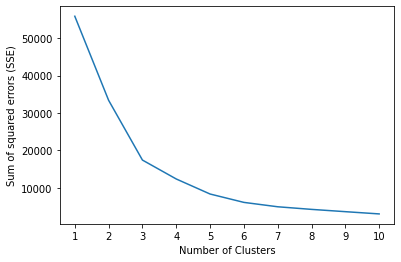

In [15]:
# Schritt 2: Plotten
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Sum of squared errors (SSE)")
plt.show()

Wir sehen den "Ellbogen" bei der Zahl 3.

In [17]:
# deshalb nehmen wir die Zahl 3 als Parameter
kmeans_ellbow = KMeans(n_clusters=3)
kmeans_ellbow.fit(X)
y_kmeans_ellbow = kmeans_ellbow.predict(X)
centroids = kmeans_ellbow.cluster_centers_

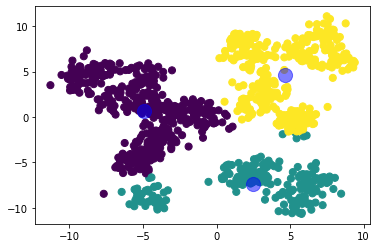

In [18]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans_ellbow, s=50)
plt.scatter(centroids[:, 0], centroids[:, 1], c='blue', s=200, alpha=0.5)

## Assoziationsregeln/ Market Basket Analyse

Das Lernen von Assoziationsregeln (**Association rule learning**) ist ein Verfahren, um aus Datenmengen automatisiert Regeln oder Abhängigkeiten zu lernen.

Ein sehr bekanntes Beispiel hierfür ist die Anzeige von "Kunden, die dies kauften, kauften auch ...." auf Amazon. Das wird auch Market Basket Analysis genannt.

Im weiteren schauen wir uns 3 verschiedene Beispiele hierfür an in steigender Komplexität und verschiedener Darstellungsformen. Eine genauere Erklärung finden Sie in den Folien zur Vorlesung.

#### Market Basket Analyse: Einfaches Beispiel

In [19]:
!pip install efficient-apriori
from efficient_apriori import apriori

shopping_transactions = [('eggs', 'bacon', 'soup'),  # Kunde 1 kaufte das alles
                         ('eggs', 'bacon', 'apple'), # Kunde 2 kaufte das alles
                         ('soup', 'bacon', 'banana'),# Kunde 3 kaufte das alles
                         ('coke')]                   # Kunde 4 kaufte nur Cola

itemsets, rules = apriori(shopping_transactions, min_support=0.3,  min_confidence=0.5)
print(rules)  

[{eggs} -> {bacon}, {bacon} -> {eggs}, {soup} -> {bacon}, {bacon} -> {soup}]


In [20]:
results = list(rules)
for i in results:
    print('\n')
    print(i)
    print('**********') 



{eggs} -> {bacon} (conf: 1.000, supp: 0.500, lift: 1.333, conv: 250000000.000)
**********


{bacon} -> {eggs} (conf: 0.667, supp: 0.500, lift: 1.333, conv: 1.500)
**********


{soup} -> {bacon} (conf: 1.000, supp: 0.500, lift: 1.333, conv: 250000000.000)
**********


{bacon} -> {soup} (conf: 0.667, supp: 0.500, lift: 1.333, conv: 1.500)
**********


Der Algorithmus hat folgendes Ergebnis:
* Wenn Eier gekauft werden, dann immer auch Speck (deshalb confidence 100%). Zudem wurden Eier in 2/4 aller Transaktionen gekauft (deshalb Support bei 50%)
* Wenn Speck gekauft wurde, wurden nicht immer Eier gekauft, bspw. wurde mal Suppe mit Speck gekauft. Deshalb hat ist die Confidence von Speck --> Eier bei 67%.

#### Masket Basket Analyse Beispiel 2: Es wird ein bißchen komplexer

Die einfachste, aber Datenaufbereitung ist hier am schwierigsten. Basiert auf folgendem [Blog](https://medium.com/analytics-vidhya/association-analysis-in-python-2b955d0180c).

In [21]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

df = pd.read_csv('https://gist.githubusercontent.com/Harsh-Git-Hub/2979ec48043928ad9033d8469928e751/raw/72de943e040b8bd0d087624b154d41b2ba9d9b60/retail_dataset.csv', sep=',')
df.head(10)

,0,1,2,3,4,5,6
0,Bread,Wine,Eggs,Meat,Cheese,Pencil,Diaper
1,Bread,Cheese,Meat,Diaper,Wine,Milk,Pencil
2,Cheese,Meat,Eggs,Milk,Wine,NaN,NaN
3,Cheese,Meat,Eggs,Milk,Wine,NaN,NaN
4,Meat,Pencil,Wine,NaN,NaN,NaN,NaN
5,Eggs,Bread,Wine,Pencil,Milk,Diaper,Bagel
6,Wine,Pencil,Eggs,Cheese,NaN,NaN,NaN
7,Bagel,Bread,Milk,Pencil,Diaper,NaN,NaN
8,Bread,Diaper,Cheese,Milk,Wine,Eggs,NaN
9,Bagel,Wine,Diaper,Meat,Pencil,Eggs,Cheese


Die Matrix sagt uns, daß der erste Kunde 7 Einkäufe hatte, der dritte Kunde 5 (deshalb die letzten beiden Einträge mit NaN).

Diese NaN-Einträge müssen wir später löschen.

Aber schauen wir uns zunächst die verschiedenen, gekauften Gegenstände an.

In [22]:
items = (df['0'].unique())
items

array(['Bread', 'Cheese', 'Meat', 'Eggs', 'Wine', 'Bagel', 'Pencil',
       'Diaper', 'Milk'], dtype=object)

In [23]:
encoded_vals = []
for index, row in df.iterrows():
    labels = {}
    uncommons = list(set(items) - set(row))
    commons = list(set(items).intersection(row))
    for uc in uncommons:
        labels[uc] = 0
    for com in commons:
        labels[com] = 1
    encoded_vals.append(labels)
encoded_vals[0]
ohe_df = pd.DataFrame(encoded_vals)

In [24]:
freq_items = apriori(ohe_df, min_support=0.2, use_colnames=True)
freq_items.head(10)

,support,itemsets
0,0.425397,(Bagel)
1,0.501587,(Milk)
2,0.438095,(Wine)
3,0.438095,(Eggs)
4,0.476190,(Meat)
5,0.361905,(Pencil)
6,0.504762,(Bread)
7,0.406349,(Diaper)
8,0.501587,(Cheese)
9,0.225397,"(Bagel, Milk)"


In [25]:
rules = association_rules(freq_items, metric="confidence", min_threshold=0.6)
print("{} Regeln gefunden".format(len(rules)))
rules.head(len(rules))

14 Regeln gefunden


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Bagel),(Bread),0.425397,0.504762,0.279365,0.656716,1.301042,0.064641,1.442650
1,(Milk),(Cheese),0.501587,0.501587,0.304762,0.607595,1.211344,0.053172,1.270148
2,(Cheese),(Milk),0.501587,0.501587,0.304762,0.607595,1.211344,0.053172,1.270148
3,(Wine),(Cheese),0.438095,0.501587,0.269841,0.615942,1.227986,0.050098,1.297754
4,(Eggs),(Meat),0.438095,0.476190,0.266667,0.608696,1.278261,0.058050,1.338624
5,(Eggs),(Cheese),0.438095,0.501587,0.298413,0.681159,1.358008,0.078670,1.563203
6,(Meat),(Cheese),0.476190,0.501587,0.323810,0.680000,1.355696,0.084958,1.557540
7,(Cheese),(Meat),0.501587,0.476190,0.323810,0.645570,1.355696,0.084958,1.477891
8,"(Milk, Meat)",(Cheese),0.244444,0.501587,0.203175,0.831169,1.657077,0.080564,2.952137
9,"(Milk, Cheese)",(Meat),0.304762,0.476190,0.203175,0.666667,1.400000,0.058050,1.571429


Die Tabelle zeigt die 14 gefundenen Regeln in Form von A --> B. Dabei wird A als Antecedent und B als Consequent bezeichnet. Das heißt simpel gesagt, "wenn A, dann B".

Die restlichen Spalten zeigen die auch vorher verwendeten Rechnungsergebnisse, wie sicher der Algorithmus sich ist bzgl. der erkannten Regeln.

Ein Nachteil des Beispiels ist die festgelegte Anzahl von 7 Shopping-Items.

Im letzten Beispiel setzen wir mehr Kunden und mehr gekaufte Gegenstände ein.

### Market Basket Analyse: Komplexes Beispiel

Der Source Code basiert auf  [Link](https://github.com/ashishpatel26/Market-Basket-Analysis)

In [26]:
import pandas as pd
import mlxtend.frequent_patterns as mix
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

!pip install apyori
from apyori import apriori

from google.colab import files
files.upload()
df = pd.read_csv('Market_Basket_Optimisation.csv')

  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5974 sha256=02800b4e8f6c575cfe58d914e353086c603840d4b5dd8182f3e4cd573cb5dc9c
  Stored in directory: /root/.cache/pip/wheels/cb/f6/e1/57973c631d27efd1a2f375bd6a83b2a616c4021f24aab84080
Successfully built apyori


Saving Market_Basket_Optimisation.csv to Market_Basket_Optimisation.csv


In [27]:
df = df.fillna('')  # ersetze NaN durch Leerzeichen

transactions = []
# Algorithmus verlangt Datenstruktur daß jeder Einkauf eine eigene Zeile ist
for i in range(0, df.shape[0]):
    transactions.append([str(df.values[i,j]) for j in range(0, df.shape[1])])

# Trainiere Apriori algorithm auf Transaktionen
rule_list = apriori(transactions, min_support = 0.002, min_confidence = 0.30, min_lift = 3, min_length = 2)

In [28]:
results = list(rule_list)
for i in results:
    print('\n')
    print(i)
    print('**********') 



RelationRecord(items=frozenset({'mushroom cream sauce', 'escalope'}), support=0.005733333333333333, ordered_statistics=[OrderedStatistic(items_base=frozenset({'mushroom cream sauce'}), items_add=frozenset({'escalope'}), confidence=0.30069930069930073, lift=3.7903273197390845)])
**********


RelationRecord(items=frozenset({'pasta', 'escalope'}), support=0.005866666666666667, ordered_statistics=[OrderedStatistic(items_base=frozenset({'pasta'}), items_add=frozenset({'escalope'}), confidence=0.37288135593220345, lift=4.700185158809287)])
**********


RelationRecord(items=frozenset({'pancakes', 'gluten free bar'}), support=0.0021333333333333334, ordered_statistics=[OrderedStatistic(items_base=frozenset({'gluten free bar'}), items_add=frozenset({'pancakes'}), confidence=0.3076923076923077, lift=3.236595101952746)])
**********


RelationRecord(items=frozenset({'ground beef', 'herb & pepper'}), support=0.016, ordered_statistics=[OrderedStatistic(items_base=frozenset({'herb & pepper'}), items